# CS285 Fall 2022 Homework 5

@ Author Juanwu Lu

@ Date  Nov-14-22

&copy; UC Berkeley

In [30]:
from __future__ import annotations

import os
import os.path as osp
from collections import defaultdict

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorboard as tb

plt.style.use('seaborn-paper')
sns.set_style('whitegrid')
csv_root = '/mnt/c/Users/Dave/Downloads/cs285_hw5_csv/'

In [11]:
# Common Tensorboard Data Preprocessing function
def _process_df(df: pd.DataFrame, name: str = None) -> None:
    assert ('Step' in df.columns) and ('Value' in df.columns)
    df.sort_values(by=['Step'], inplace=True)
    df.rename(
        columns={'Step': 'Time Step', 'Value': name or 'Value'},
        inplace=True
    )
    if 'Wall time' in df.columns:
        df.drop(labels=['Wall time'], axis=1, inplace=True)

## Problem 1: "Unspervised" RND and exploration performance

- <input type="checkbox" checked> Implement the RND algorithm
- <input type="checkbox" checked> Use the `argmax` policy regarding exploration critic to generate state-action tuples
- <input type="checkbox" checked> __Pick two of the three envs and compare RND exploration to random one__
- <input type="checkbox" checked> Implement a separate exploration strategy of your own choice.

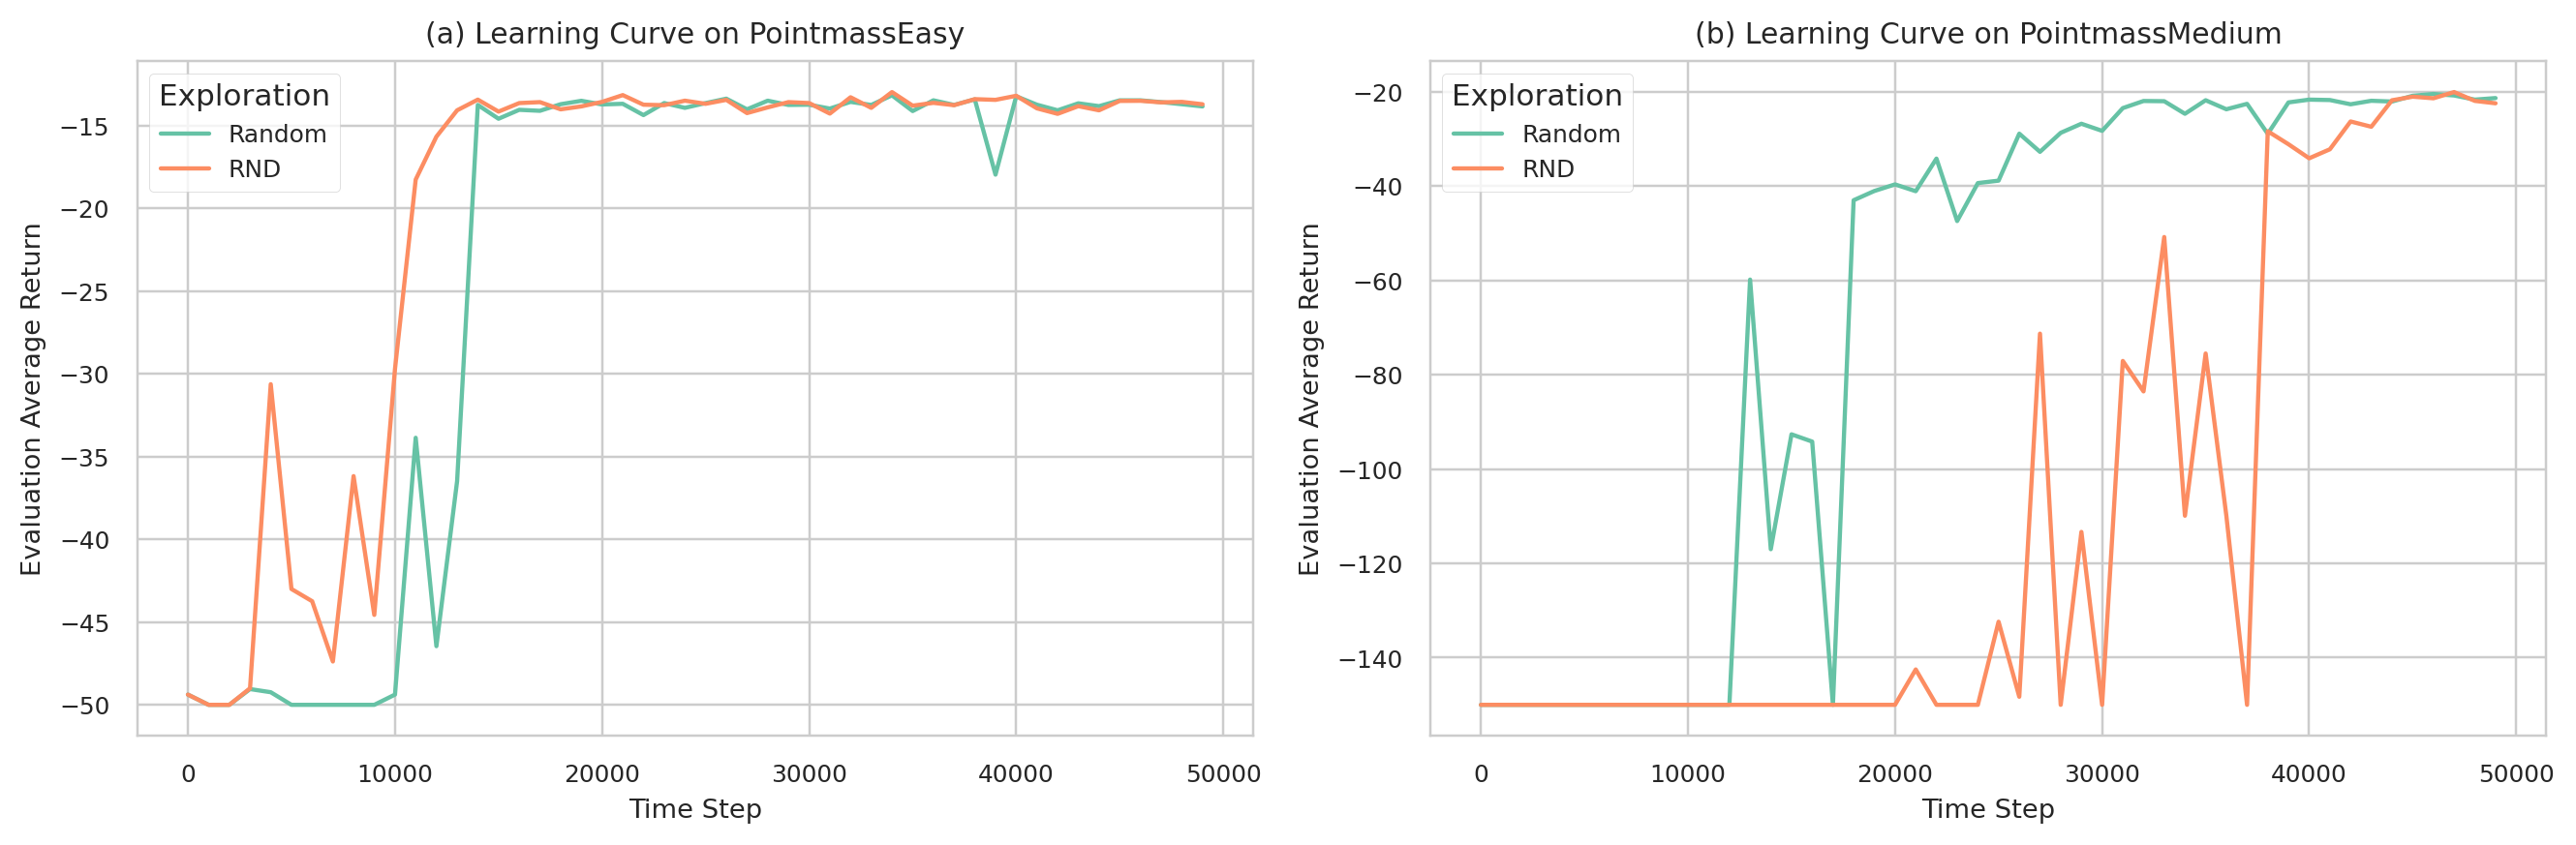

In [27]:
# PointmassEasy Environment
df_easy_random = pd.read_csv(
    osp.join(csv_root, 'q1', 'run-hw5_expl_q1_env1_random_PointmassEasy'
    '-v0_20-11-2022_12-18-59-tag-Eval_AverageReturn.csv'),
    sep=',', encoding='utf-8'
)
_process_df(df_easy_random, 'Evaluation Average Return')
df_easy_random['Exploration'] = 'Random'
df_easy_rnd = pd.read_csv(
    osp.join(csv_root, 'q1', 'run-hw5_expl_q1_env1_rnd_PointmassEasy'
    '-v0_20-11-2022_12-18-59-tag-Eval_AverageReturn.csv'),
    sep=',', encoding='utf-8'
)
_process_df(df_easy_rnd, 'Evaluation Average Return')
df_easy_rnd['Exploration'] = 'RND'
df_easy = pd.concat([df_easy_random, df_easy_rnd])

# PointmassMedium Environment
df_medium_random = pd.read_csv(
    osp.join(csv_root, 'q1', 'run-hw5_expl_q1_env1_random_PointmassMedium'
    '-v0_20-11-2022_12-18-59-tag-Eval_AverageReturn.csv'),
    sep=',', encoding='utf-8'
)
_process_df(df_medium_random, 'Evaluation Average Return')
df_medium_random['Exploration'] = 'Random'
df_medium_rnd = pd.read_csv(
    osp.join(csv_root, 'q1', 'run-hw5_expl_q1_env1_rnd_PointmassMedium'
    '-v0_20-11-2022_12-18-59-tag-Eval_AverageReturn.csv'),
    sep=',', encoding='utf-8'
)
_process_df(df_medium_rnd, 'Evaluation Average Return')
df_medium_rnd['Exploration'] = 'RND'
df_medium = pd.concat([df_medium_random, df_medium_rnd])

fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=224)
axes[0] = sns.lineplot(df_easy, x='Time Step', y='Evaluation Average Return',
                  hue='Exploration', palette='Set2', ax=axes[0])
axes[0].set_title('(a) Learning Curve on PointmassEasy')
axes[1] = sns.lineplot(df_medium, x='Time Step', y='Evaluation Average Return',
                  hue='Exploration', palette='Set2', ax=axes[1])
axes[1].set_title('(b) Learning Curve on PointmassMedium')

fig.tight_layout()
fig.savefig('../docs/hw5_report/img/q1_learning_curve.png', dpi=600)

## Problem 2: Offline learning on exploration data

- <input type="checkbox"> Implement the conservative Q-learning algorithm
- <input type="checkbox"> Use the CQL critic as the extrinsic critic and compare it to a standard DQN critic.
- <input type="checkbox">

## Problem 3: "Supervised" exploration with mixed reward bonuses

- <input type="checkbox">

## Problem 4: Offline Learning with AWAC

- <input type="checkbox" checked> `PointmassEasy` with unsupervised AWAC
- <input type="checkbox" checked> `PointmassEasy` with supervised AWAC
- <input type="checkbox" checked> `PointmassMedium` with unsupervised AWAC
- <input type="checkbox" checked> `PointmassMedium` with supervised AWAC

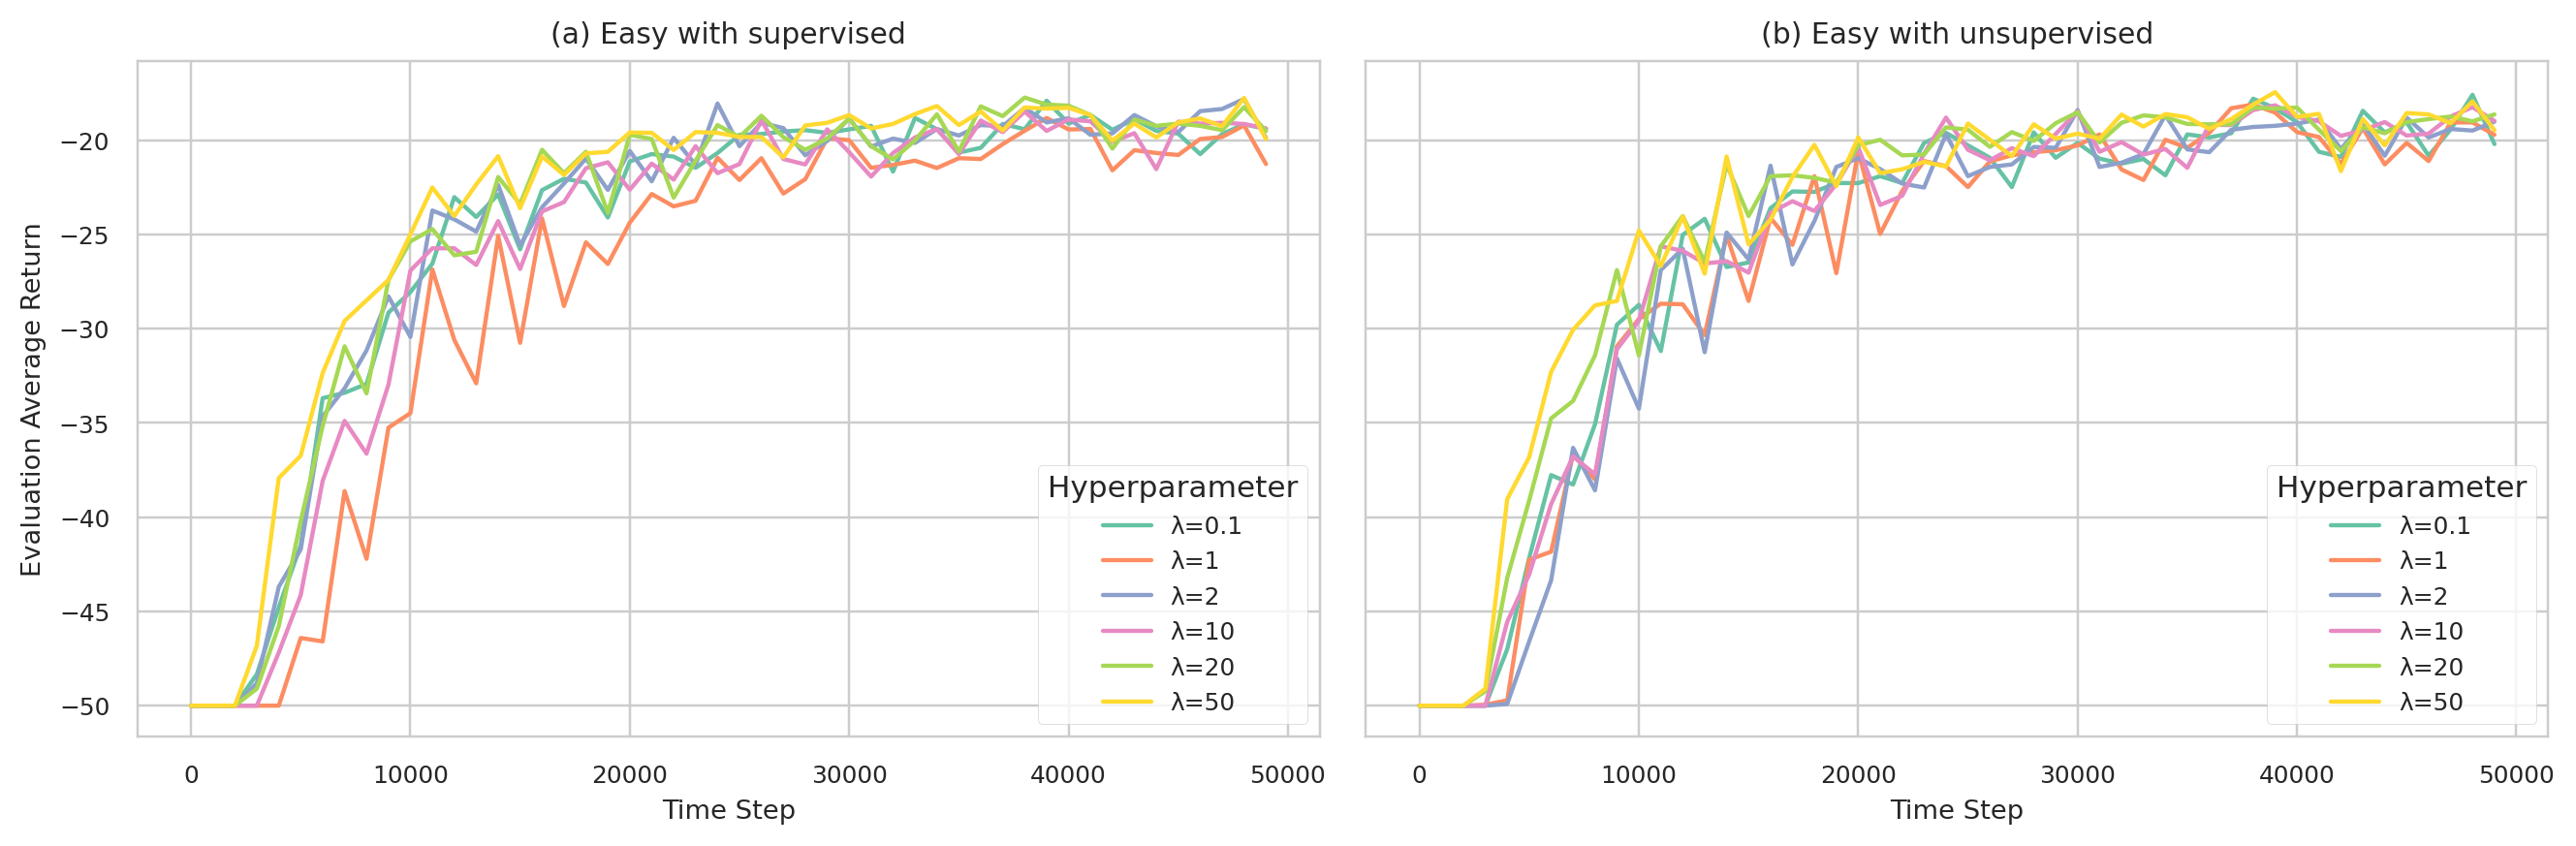

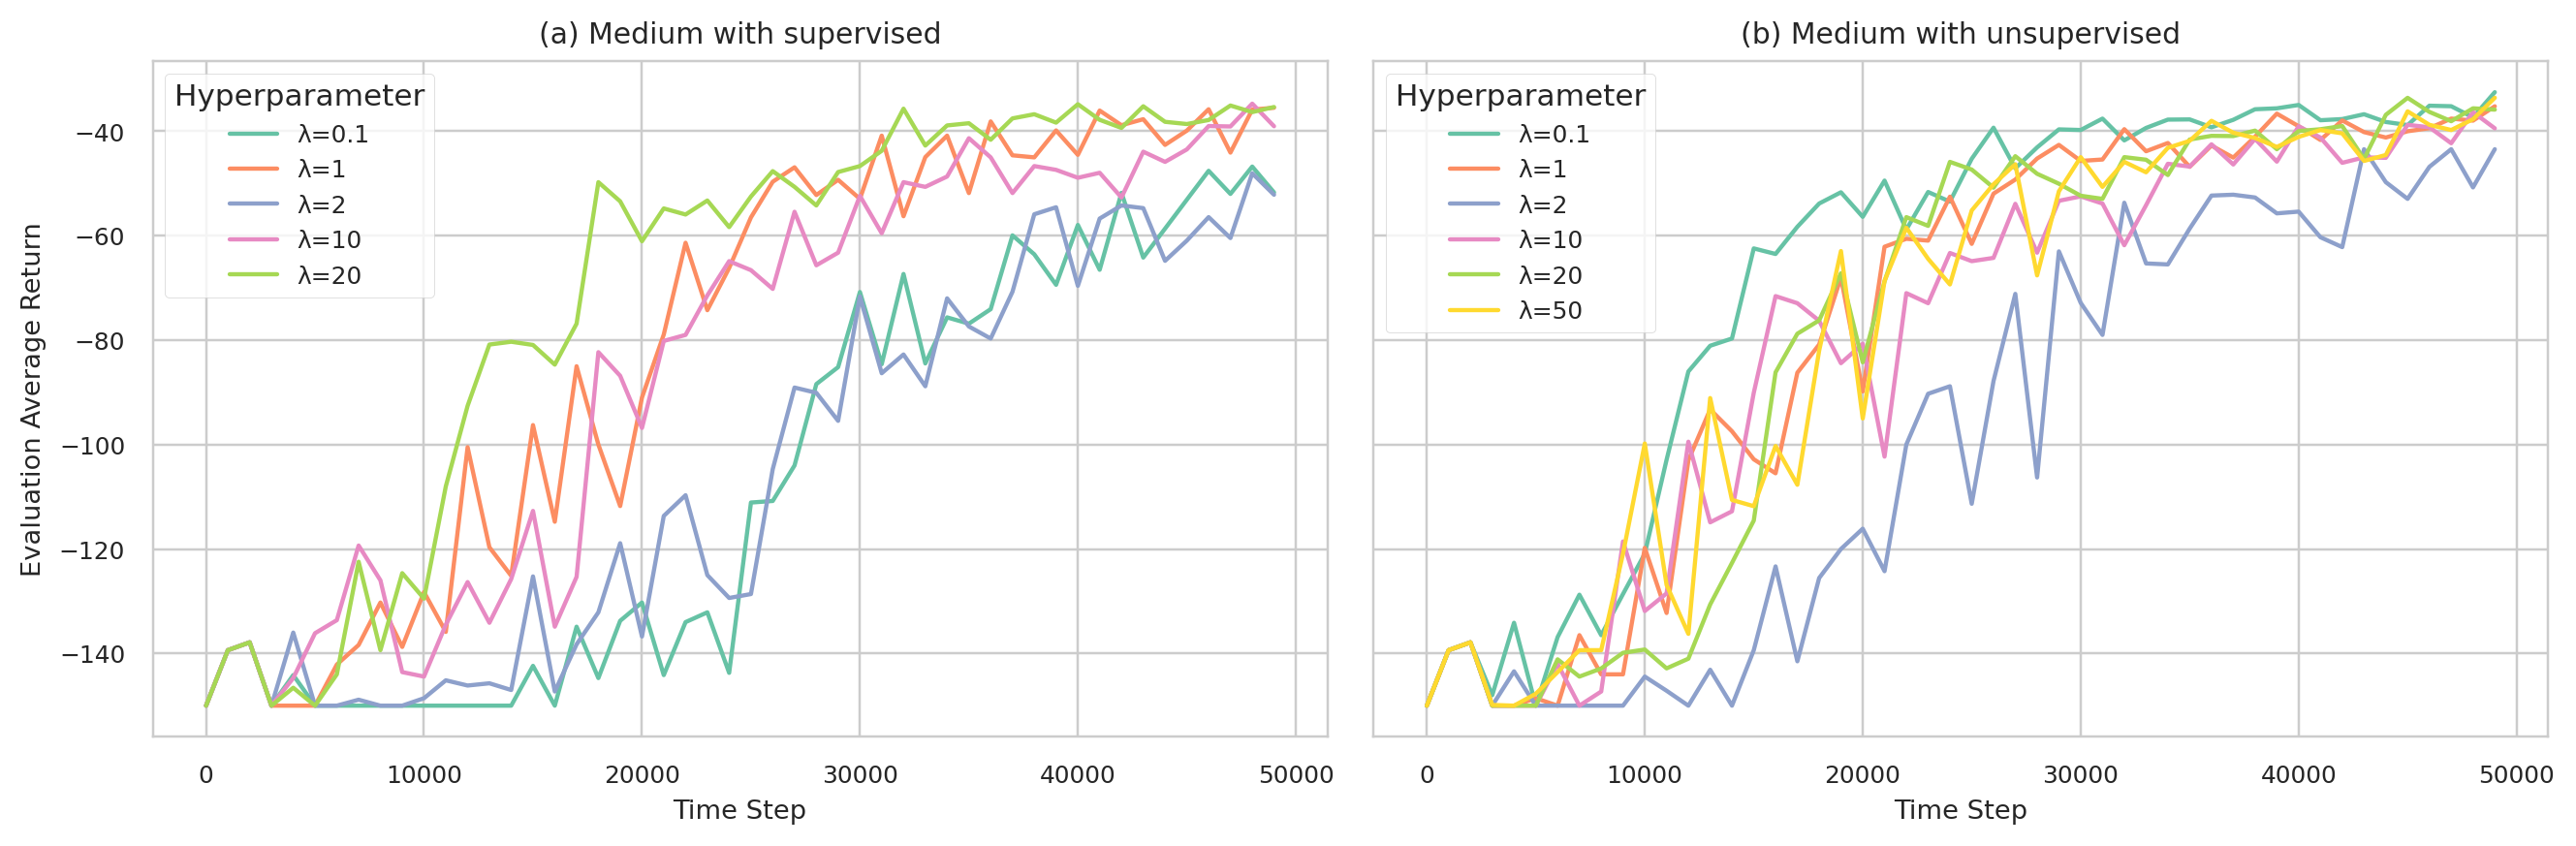

In [42]:
folders = os.listdir(osp.join(csv_root, 'q4'))
index_map = defaultdict(list)

for folder in folders:
    env_name, alg_type = folder.split('_')
    index_map[env_name].append(alg_type)

for env_name, alg_types in index_map.items():
    fig, axes = plt.subplots(1, len(alg_types), sharey=True,
                             figsize=(6 * len(alg_types), 4), dpi=224)
    for i, alg_type in enumerate(alg_types):
        files = os.listdir(
            osp.join(csv_root, 'q4', f'{env_name}_{alg_type}')
        )
        df_list = []
        for file in files:
            lambda_val = file.split('_')[6].split('lam')[1]
            df = pd.read_csv(
                osp.join(csv_root, 'q4', f'{env_name}_{alg_type}', file),
                sep=',', encoding='utf-8'
            )
            _process_df(df, 'Evaluation Average Return')
            df['Hyperparameter'] = f'λ={lambda_val}'
            df['Lambda'] = float(lambda_val)
            df_list.append(df)

        data = pd.concat(df_list).sort_values(by='Lambda')

        axes[i] = sns.lineplot(data=data,
                               x='Time Step',
                               y='Evaluation Average Return',
                               hue='Hyperparameter',
                               palette='Set2',
                               ax=axes[i])
        axes[i].set_title(
            f'({chr(97 + i)}) {env_name.capitalize()} with {alg_type}'
        )

    fig.tight_layout()
    fig.savefig(f'../docs/hw5_report/img/q4_{env_name}.png', dpi=600)


## Problem 5: Offline Learning with IQL